In [2]:

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# load pretrained model
import torch


# Load the checkpoint
checkpoint = torch.load('./runs/detect/train/weights/best.pt')

# Manually check for model key
if 'model' not in checkpoint:
    print("Checkpoint is missing 'model' key!")
    # Handle reconstruction or debug further
else:
    print("Checkpoint is valid!")

# Try loading the model
model = YOLO('yolov8n.yaml')
model.load('./runs/detect/train4/weights/best.pt')

Checkpoint is valid!
Transferred 319/355 items from pretrained weights


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
metrics=model.val(data='data.yaml')

Ultralytics 8.3.51  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 31,920 gradients, 8.7 GFLOPs


val: Scanning C:\Users\TANUJ\Downloads\Object Detection\datasets\test_images.cache... 71 images, 0 backgrounds, 0 corru
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<0

                   all         71        119          0          0          0          0


Speed: 1.9ms preprocess, 6.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs\detect\val



image 1/1 C:\Users\TANUJ\Downloads\Object Detection\datasets\test_images\vid_4_13820.jpg: 384x640 (no detections), 52.6ms
Speed: 4.0ms preprocess, 52.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


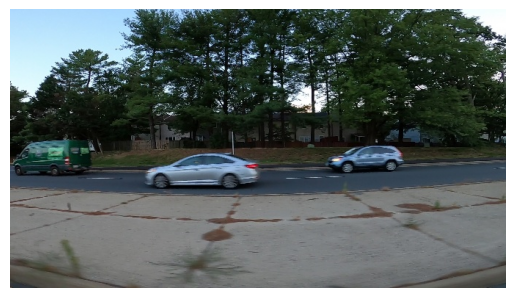

In [6]:
image_path='datasets/test_images/vid_4_13820.jpg'
image=cv2.imread(image_path)
results=model(image_path)
for result in results:
    for detection in result.boxes:
        x_min,y_min,x_max,y_max=detection.xyxy[0]
        confidence=detection.conf[0]
        class_id=int(detection.cls[0])
        #draw bounding box
        cv2.rectangle(image,(int(x_min),int(y_min)),(int(x_max),int(y_max)),(0,255,0),2)
        #write label
        label=f"Car {confidence}"
        cv2.putText(image,label,(int(x_min),int(y_min) -10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

#convert the image to rgb
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
